# (04) rebuttal results: dim

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
# sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
# sys.path.insert(0, '/home/hadi/Dropbox/chkpts/pvae-source-code')
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

['temp.pdf', 'anneal_lin.pdf', 'samples_hist.pdf', 'logreg.pdf', 'dim.pdf', 'anneal_exp.pdf', 'anneal.pdf']

## Load df

In [4]:
df_dim = pjoin(tmp_dir, 'df_dim.df')
df_dim = pd.read_pickle(df_dim)

In [5]:
df_dim

,checkpoint,timestamp,dataset,type,enc_type,dec_type,n_dims,seed,kl_beta,n_params,...,active,mse,kl,kl_diag,mse_map,nelbo,temp_anneal,temp_start,temp_stop,hard_fwd
0,1500,"2024_08_04,15:05",CIFAR16,poisson,conv,lin,128,1,1.0,1257372,...,0.968750,136.830399,31.436794,0.245600,102.168587,168.267197,lin,1.0,0.05,False
1,3000,"2024_08_04,15:05",vH16,poisson,conv,lin,128,1,1.0,1257372,...,0.976562,138.071915,30.357105,0.237167,105.085968,168.429016,lin,1.0,0.05,False
2,1500,"2024_08_04,15:05",CIFAR16,poisson,lin,lin,128,1,1.0,65664,...,0.953125,140.340347,29.660616,0.231724,106.782204,170.000961,lin,1.0,0.05,False
3,3000,"2024_08_04,15:05",vH16,poisson,lin,lin,128,1,1.0,65664,...,1.000000,142.182922,28.232412,0.220569,110.627022,170.415329,lin,1.0,0.05,False
4,1500,"2024_08_04,19:52",CIFAR16,poisson,conv,lin,256,1,1.0,1306780,...,0.980469,129.856232,34.338444,0.134135,93.357323,164.194672,lin,1.0,0.05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3000,"2024_08_05,05:10",vH16,poisson,lin,lin,768,3,1.0,393984,...,0.993490,137.937347,31.950546,0.041599,103.286446,169.887894,lin,1.0,0.05,False
68,1500,"2024_08_05,17:38",CIFAR16,poisson,conv,lin,1024,3,1.0,1603228,...,0.997070,126.436600,34.939571,0.034121,89.471954,161.376175,lin,1.0,0.05,False
69,3000,"2024_08_05,21:39",vH16,poisson,conv,lin,1024,3,1.0,1603228,...,0.829102,132.322357,31.741152,0.030998,98.533394,164.063507,lin,1.0,0.05,False
70,1500,"2024_08_05,07:00",CIFAR16,poisson,lin,lin,1024,3,1.0,525312,...,0.992188,132.819626,34.496033,0.033688,95.336273,167.315659,lin,1.0,0.05,False


## Make fig

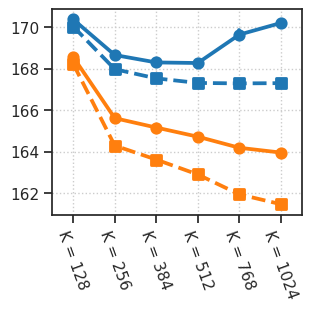

In [6]:
_pal = {'lin': 'C0', 'conv': 'C1'}
fig, ax = create_figure(1, 1, (3, 3))

sns.pointplot(
    data=df_dim.loc[df_dim['dataset'] == 'vH16'],
    x='n_dims',
    y='nelbo',
    hue='enc_type',
    palette=_pal,
    markers='o',
    linestyles='-',
    ax=ax
)
sns.pointplot(
    data=df_dim.loc[df_dim['dataset'] == 'CIFAR16'],
    x='n_dims',
    y='nelbo',
    hue='enc_type',
    palette=_pal,
    markers='s',
    linestyles='--',
    ax=ax
)
xticklabels = ax.get_xticklabels()
xticklabels = [
    f"K = {int(t.get_text())}"
    for t in xticklabels
]
ax.set(
    xticklabels=xticklabels,
    xlabel='',
    ylabel='',
)
ax.tick_params(axis='x', rotation=-70)

move_legend(ax)
ax.grid()

fig.savefig(pjoin(fig_dir, 'dim.pdf'), **kws_fig)
plt.show()

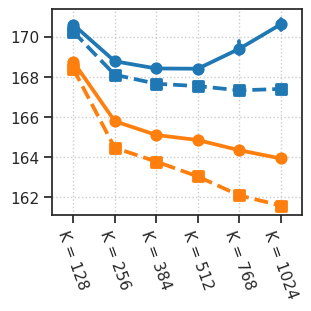

In [6]:
### was temp_stop = 0.01